# MOST STREAMED SPOTIFY SONG ANALYSIS USING MACHINE LEARNING ALGORITHMS

In [201]:
# Import the 'warnings' module to manage warnings in the code
import warnings
# Ignore all warnings to prevent them from being displayed during code execution
warnings.filterwarnings('ignore')
# Import the required libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Import the 'StandardScaler' class from the'sklearn.preprocessing' module
from sklearn.preprocessing import StandardScaler

In [202]:
# Open the "spotify-2023.csv" CSV file and read it into the Pandas DataFrame ('df_sportify').
# To address character encoding issues, specify the encoding as "cp775".
df_sportify = pd.read_csv("spotify-2023.csv", encoding = "cp775")

# Data Extraction

In [203]:
# To quickly examine the data, show the first 5 rows of the DataFrame "df_sportify."
df_sportify.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [204]:
# To quickly examine the data, show the last 5 rows of the DataFrame "df_sportify."
df_sportify.tail(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


# Data Pre-Processing

In [248]:
# Display the count of unique values in the 'artist_count' column
df_sportify['artist_count'].value_counts()

1    587
2    254
3     85
4     15
5      5
6      3
8      2
7      2
Name: artist_count, dtype: int64

In [249]:
# Display the count of unique values in the 'released_year' column
df_sportify['released_year'].value_counts()

2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: released_year, dtype: int64

In [250]:
# Display the count of unique values in the 'released_month' column
df_sportify['released_month'].value_counts()

1     134
5     128
3      86
6      86
11     80
12     75
10     73
4      66
7      62
2      61
9      56
8      46
Name: released_month, dtype: int64

In [251]:
# Display the count of unique values in the 'released_day' column
df_sportify['released_day'].value_counts()

1     95
21    44
13    43
24    40
2     39
20    39
4     39
7     39
6     39
10    37
9     36
22    33
3     32
25    28
17    28
14    26
8     25
19    25
5     25
23    23
29    23
30    22
11    22
28    21
27    21
15    21
16    20
31    19
18    19
12    17
26    13
Name: released_day, dtype: int64

In [252]:
# Display the count of unique values in the 'in_spotify_playlists' column
df_sportify['in_spotify_playlists'].value_counts()

1150     3
1112     3
356      3
86       3
3006     3
        ..
2598     1
542      1
2459     1
10624    1
1320     1
Name: in_spotify_playlists, Length: 879, dtype: int64

In [253]:
# Display the count of unique values in the 'in_spotify_charts' column
df_sportify['in_spotify_charts'].value_counts()

0      405
4       48
2       42
6       36
3       18
      ... 
76       1
58       1
79       1
66       1
147      1
Name: in_spotify_charts, Length: 82, dtype: int64

In [254]:
# Display the count of unique values in the 'streams' column
df_sportify['streams'].value_counts()

723894473     2
156338624     2
1223481149    2
395591396     2
1695712020    1
             ..
1357608774    1
294352144     1
972164968     1
920045682     1
96007391      1
Name: streams, Length: 949, dtype: int64

In [255]:
# Display the count of unique values in the 'danceability_%' column
df_sportify['danceability_%'].value_counts()

70    43
77    32
80    31
56    30
74    29
      ..
23     1
27     1
29     1
96     1
38     1
Name: danceability_%, Length: 72, dtype: int64

In [256]:
# Display the count of unique values in the 'speechiness_%' column
df_sportify['speechiness_%'].value_counts()

4     175
3     152
5     130
6      76
8      52
7      49
9      37
10     24
11     22
12     16
14     15
13     12
16     11
23     11
20     10
24     10
25      9
36      8
28      8
21      8
31      8
29      7
33      7
32      7
22      7
19      7
15      6
34      6
17      6
26      6
18      6
27      5
39      5
38      5
40      4
30      4
35      4
46      3
2       3
37      2
44      2
45      2
42      1
64      1
49      1
41      1
43      1
59      1
Name: speechiness_%, dtype: int64

In [214]:
# Provide a succinct overview of the DataFrame 'df_sportify'. This covers memory usage, non-null counts, and data types.
df_sportify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [215]:
# This helps determine the existence and amount of missing data in the dataset by checking and displaying the sum of the missing values in each column of the DataFrame "df_sportify."
df_sportify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

# Data Visualization

In [216]:
#Sort the DataFrame 'df_sportify' according to the 'key' column, then count how many times each group's 'in_spotify_playlists' appears.
count_sportify_play = df_sportify.groupby('key')['in_spotify_playlists'].count().reset_index()
# Use Plotly Express to create a bar plot that displays the total number of playlists according to the song keys.
plot1 = px.bar(count_sportify_play, x='key', y='in_spotify_playlists', title='Total playlist with respect to key of the songs')
# Use the previously defined Plotly Express object 'plot1' to display the generated plot.
plot1.show()

In [217]:
#Group the'mode' column of the DataFrame 'df_sportify', then add up the 'in_spotify_playlists' for every group.
sum_sportify_play = df_sportify.groupby('mode')['in_spotify_playlists'].sum().reset_index()
# Use Plotly Express to create a pie chart that displays the total number of playlists in relation to the song mode.
plot2 = px.pie(sum_sportify_play, values='in_spotify_playlists', names='mode', title='Total paylist with respect to mode')
# Display the pie chart
plot2.show()

In [218]:
# Compute the total of 'danceability_%' for each year by grouping the DataFrame 'df_sportify' by the'released_year' column.
#Using Plotly Express, create an area plot that shows the total amount of danceability relative to the year that the songs were released.
sum_dancebility = df_sportify.groupby('released_year')['danceability_%'].sum().reset_index()
plot3 = px.area(sum_dancebility, x='released_year', y='danceability_%', title='Total sum of the danceability of song with respect to year')
plot3.show()

In [219]:
#To find the total of'speechiness_%' for each key, group the DataFrame 'df_sportify' by the 'key' column.
# Using Plotly Express, create an area plot that shows the total sum of the speechiness percentage in relation to the song key.
sum_speechiness = df_sportify.groupby('key')['speechiness_%'].sum().reset_index()
plot4 = px.area(sum_speechiness, x='key', y='speechiness_%', title='Total sum of the speechiness percentage song with respect to key')
plot4.show()

In [220]:
# Count the instances of'streams' for each key by grouping the DataFrame 'df_sportify' by the 'key' column.
# 'Most Stream analysis': use Plotly Express to create a pie chart that shows the distribution of streams among various keys.
sum_sportify_stream = df_sportify.groupby('key')['streams'].count().reset_index()
plot5 = px.pie(sum_sportify_stream, values='streams', names='key', title='Most Stream analysis')
plot5.show()

In [221]:
# Group the DataFrame 'df_sportify' by the 'mode' column and count the occurrences of 'streams' for each mode.
# Create a pie chart using Plotly Express, displaying the distribution of streams among different modes in a 'Most stream by mode' analysis.
sum_sportify_stream1 = df_sportify.groupby('mode')['streams'].count().reset_index()
plot6 = px.pie(sum_sportify_stream1, values='streams', names='mode', hole=0.6, title='Most stream by mode')
plot6.show()

In [222]:
# Take specific columns out of the DataFrame 'df_sportify': 'artist(s)_name, track_name, in_deezer_playlists, in_shazam_charts, key'.
# Columns are dropped when the 'axis=1' parameter is used, and changes are applied directly to the original DataFrame when the 'inplace=True' option is selected.
df_sportify.drop(['artist(s)_name','track_name', 'in_deezer_playlists', 'in_shazam_charts', 'key'], axis=1, inplace=True)

In [223]:
# After removing certain columns, show the first few rows of the updated DataFrame "df_sportify"
df_sportify.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703,43,263,10,125,Major,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286,48,126,14,92,Major,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974,94,207,14,138,Major,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817,116,207,12,170,Major,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322,84,133,15,144,Minor,65,23,80,14,63,11,6


In [224]:
# Show a brief summary of the updated DataFrame "df_sportify" # Data types, non-null counts, and memory usage following column removal are all included in this.
df_sportify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist_count          953 non-null    int64 
 1   released_year         953 non-null    int64 
 2   released_month        953 non-null    int64 
 3   released_day          953 non-null    int64 
 4   in_spotify_playlists  953 non-null    int64 
 5   in_spotify_charts     953 non-null    int64 
 6   streams               953 non-null    int64 
 7   in_apple_playlists    953 non-null    int64 
 8   in_apple_charts       953 non-null    int64 
 9   in_deezer_charts      953 non-null    int64 
 10  bpm                   953 non-null    int64 
 11  mode                  953 non-null    object
 12  danceability_%        953 non-null    int64 
 13  valence_%             953 non-null    int64 
 14  energy_%              953 non-null    int64 
 15  acousticness_%        953 non-null    in

In [225]:
# Convert the values in DataFrame 'df_sportify's'mode' column to binary representation:
#'Major' corresponds to 1 and 'Minor' to 0.
df_sportify['mode'] = df_sportify['mode'].map({'Major': 1, 'Minor': 0})

In [226]:
#Present a brief description of the DataFrame 'df_sportify' following the application of binary representation to the'mode' column.
df_sportify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          953 non-null    int64
 1   released_year         953 non-null    int64
 2   released_month        953 non-null    int64
 3   released_day          953 non-null    int64
 4   in_spotify_playlists  953 non-null    int64
 5   in_spotify_charts     953 non-null    int64
 6   streams               953 non-null    int64
 7   in_apple_playlists    953 non-null    int64
 8   in_apple_charts       953 non-null    int64
 9   in_deezer_charts      953 non-null    int64
 10  bpm                   953 non-null    int64
 11  mode                  953 non-null    int64
 12  danceability_%        953 non-null    int64
 13  valence_%             953 non-null    int64
 14  energy_%              953 non-null    int64
 15  acousticness_%        953 non-null    int64
 16  instrume

In [227]:
# To evaluate the effects of earlier changes, check and show the total of missing values in each column of the DataFrame "df_sportify" .
df_sportify.isnull().sum()

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

# Random Forest Classifier

In [228]:
# Import the Scikit-Learn modules required for RandomForestClassifier.
# Import functions to divide the dataset and assess the performance of the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [229]:
# For modeling, keep the target variable (y) and the features (X) apart.
# Y contains the'mode' column, which represents the target variable, while
# X contains all other columns.
X = df_sportify.drop('mode', axis=1)
y = df_sportify['mode']

In [230]:
# Use train_test_split to divide the dataset into training and testing sets.
# X_train and y_train stand for the training features and target variable, and X_test and y_test for the testing features and variable.
# For reproducibility, a random seed (random_state=42) is utilized, and the test set size is set to 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [232]:
rf_y_pred = rf_model.predict(X_test)

In [233]:
accuracy_rf = accuracy_score(y_test, rf_y_pred)
print('Accuracy of  RandomForestClassifier is ', round(accuracy_rf,2))

Accuracy of  RandomForestClassifier is  0.59


In [234]:
rf_report = classification_report(y_test, rf_y_pred)

print('Classification Report:\n', rf_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.37      0.44        83
           1       0.61      0.75      0.67       108

    accuracy                           0.59       191
   macro avg       0.57      0.56      0.56       191
weighted avg       0.58      0.59      0.57       191



# Linear Regression

In [258]:
# Import the Scikit-Learn modules required for LinearRegression.
from sklearn.linear_model import LinearRegression

In [236]:
# Creating X and y
X = df_sportify['released_month']
y = df_sportify['streams']

In [237]:
#Splitting the variables as training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [238]:
# Reshaping the train set without adding a new column
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Creating an instance of the Linear Regression model
linear_model = LinearRegression()

# Fitting the model using the .fit() method
linear_model.fit(X_train_reshaped, y_train)

LinearRegression()

In [239]:
# Displaying the intercept value
print("Intercept Value:", linear_model.intercept_)

# Displaying the slope value
print('Slope Value:', linear_model.coef_[0])

Intercept Value: 503289040.99568623
Slope Value: 985953.7146833077


In [240]:
# Generating predictions for y_values
predicted_y_train = linear_model.predict(X_train_reshaped)
predicted_y_test = linear_model.predict(X_test_reshaped)

#Calculating the R-squared value
r_squared = r2_score(y_test, predicted_y_test)
print("R-squared:", r_squared)

# Comparing the R-squared values for both the training and testing datasets
print("R-squared on Train Data:", r2_score(y_train, predicted_y_train))
print("R-squared on Test Data:", r2_score(y_test, predicted_y_test))

R-squared: -0.002235377063729338
R-squared on Train Data: 3.4999363452525856e-05
R-squared on Test Data: -0.002235377063729338


In [241]:
# Generate predictions on the test dataset
predicted_y = linear_model.predict(X_test_reshaped)

# Assess the model performance using regression metrics
mse = mean_squared_error(y_test, predicted_y)
mae = mean_absolute_error(y_test, predicted_y)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.6679141351877642e+17
Mean Absolute Error: 370968404.78580385


# DecisionTreeClassifier

In [257]:
# Import the Scikit-Learn modules required for DecisionTreeClassifier.
from sklearn.tree import DecisionTreeClassifier

In [243]:
X = df_sportify.drop('mode', axis=1)  # Features
y = df_sportify['mode']  # Target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [244]:
#Establish a decision tree classifier
classifier_model = DecisionTreeClassifier()

#Train the model using the training dataset
classifier_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [245]:
# Generate predictions on the test dataset
predicted_y_test = classifier_model.predict(X_test)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, classifier_model.predict(X_train))

# Compute test accuracy
testing_accuracy = accuracy_score(y_test, predicted_y_test)

# Assess validation accuracy
validation_accuracy = accuracy_score(y_val, classifier_model.predict(X_val))

# Compute cross-validation score
cross_validation_score = cross_val_score(classifier_model, X, y, cv=5).mean()

# Display the results
print("Train Accuracy:", training_accuracy)
print("Test Accuracy:", testing_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Cross-Validation Score:", cross_validation_score)

Train Accuracy: 1.0
Test Accuracy: 0.5034965034965035
Validation Accuracy: 0.5944055944055944
Cross-Validation Score: 0.5393331496279967


In [246]:
# Create a classification report
classification_report_result = classification_report(y_test, predicted_y_test, output_dict=True)

# Convert the classification report dictionary into a DataFrame
classification_report_dataframe = pd.DataFrame(classification_report_result).transpose()

# Display the Classification Report DataFrame
print("\nClassification Report:")
print(classification_report_dataframe)


Classification Report:
              precision    recall  f1-score     support
0              0.409091  0.457627  0.432000   59.000000
1              0.584416  0.535714  0.559006   84.000000
accuracy       0.503497  0.503497  0.503497    0.503497
macro avg      0.496753  0.496671  0.495503  143.000000
weighted avg   0.512079  0.503497  0.506605  143.000000



Confusion Matrix:


<Axes: >

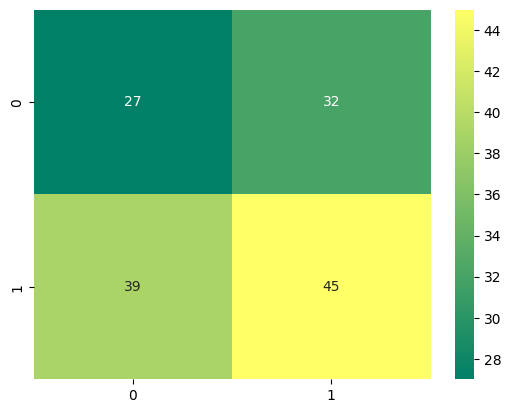

In [247]:
#Display the Confusion Matrix
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, predicted_y_test), annot=True, cmap='summer')